Produce plots of the electric field of four point charges: two positive (+q$_{o}$) located at $\vec{r_{1,2}}$ = $\pm a\hat{z}$ and two negative (-q$_{o}$) located at $\vec{r_{3,4}}$ = $\pm a\hat{x}$. You can use either a stream plot or a vector plot to indicate the direction of the electric field, but the magnitude of the electric field should be plotted as a density plot (or a 2D histogram). 

Note: The analytical expression for the field should be determined on paper, and is trivially easy. Your grade will be based on how well you convey information through the plotting.

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import sys

In [4]:
%matplotlib nbagg

In [5]:
mag = lambda array: np.sqrt(array[0]**2 + array[1]**2 + array[2]**2)

def E_field(x, y, z, a=1):
    r1p = np.array([x, y, z-a])
    r2p = np.array([x, y, z+a])
    r3p = np.array([x-a, y, z])
    r4p = np.array([x+a, y, z])
    
    E_field = r1p/mag(r1p)**3 + r2p/mag(r2p)**3 - r3p/mag(r3p)**3 - r4p/mag(r4p)**3
    
    return E_field

In [6]:
E_field(0,0,0)

array([0., 0., 0.])

In [7]:
E_field(0,1,0)

array([0., 0., 0.])

In [8]:
#Set these numbers according to your problem
n = 25
x_ulim = 1.5
x_llim = -1.5
y_ulim = x_ulim
y_llim = x_llim
z_ulim = x_ulim
z_llim = x_llim

radius = np.sqrt((x_llim - x_ulim)**2 + (y_llim - y_ulim)**2 + (z_llim - z_ulim)**2)

In [9]:
x_array = np.linspace(x_llim, x_ulim, n)
y_array = np.linspace(y_llim, y_ulim, n)
z_array = np.linspace(z_llim, z_ulim, n)

In [10]:
scale_free = n/2 #scaling factor for when you want to display directions of field qualitatively; DEPENDS ON PROBLEM

In [14]:
#scaling factor for when you want to display BOTH magnitudes and directions qualitatively; 
#DEPENDS ON PROBLEM

scale_lim = radius/10 #how long do you want the magnitudes to be, before it is too long

scale_vec_mag = 50

In [25]:
vec_mag_show = True #sometimes it is better to show both magnitude and direction. Set this to true, if that is the case.

<IPython.core.display.Javascript object>


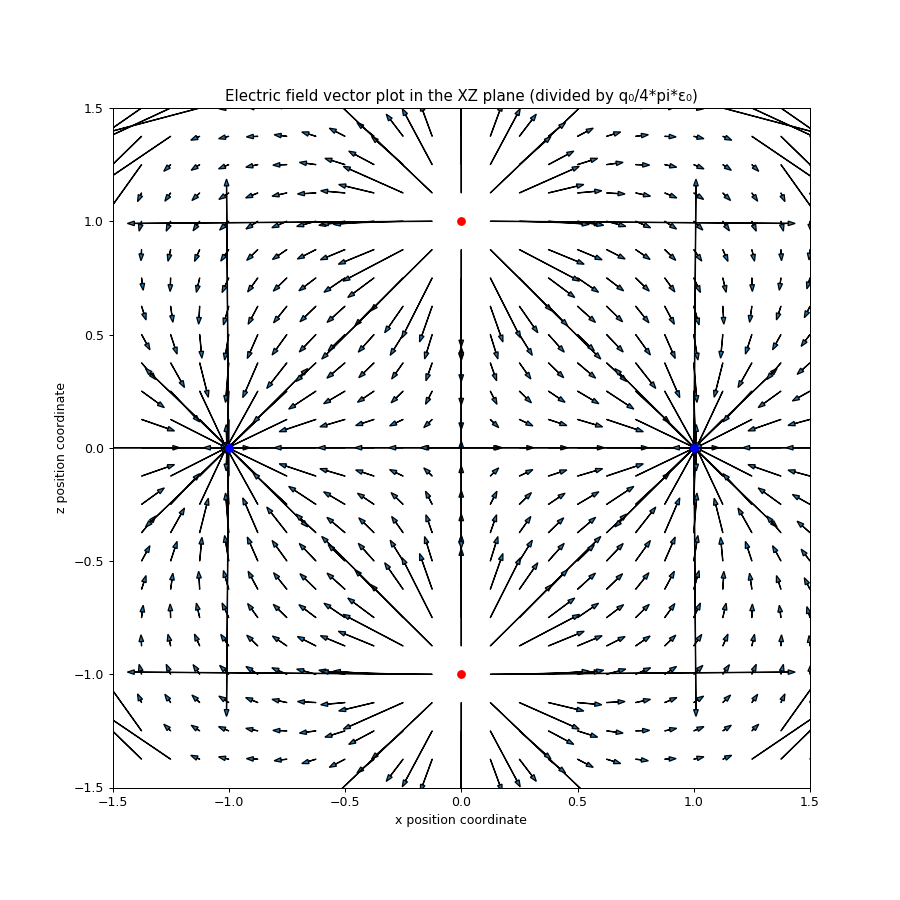

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


Red dots represent charge of +q₀
Blue dots represent charge of -q₀
Y_component of Electric field is not shown


In [27]:
plt.figure(figsize=[10,10])

for i in range(1, len(x_array)):
    for k in range(1, len(z_array)):
        Ex, Ey, Ez = E_field(x_array[i], 0, z_array[k])
        
        if vec_mag_show:
            E_mag = mag([Ex, Ey, Ez])
            if E_mag > scale_lim:
                plt.arrow(x_array[i], z_array[k], Ex/scale_vec_mag, Ez/scale_vec_mag, head_width=0.02)
            else:
                plt.arrow(x_array[i], z_array[k], Ex, Ez, head_width=0.02) 
        else:
            E_mag = mag([Ex, Ey, Ez])*scale_free
            plt.arrow(x_array[i], z_array[k], Ex/E_mag, Ez/E_mag, head_width=0.02) 
        
        #plt.arrow(x, y, dx, dy, **kwargs)
        #This draws an arrow from ``(x, y)`` to ``(x+dx, y+dy)``
        
plt.axis([x_llim, x_ulim, z_llim, z_ulim])

plt.plot([0, 0], [1, -1], 'ro')
plt.plot([1, -1], [0, 0], 'bo')

plt.xlabel("x position coordinate")
plt.ylabel("z position coordinate")
plt.title("Electric field vector plot in the XZ plane (divided by q\u2080/4*pi*\u03b5\u2080)")

print("Red dots represent charge of +q\u2080")
print("Blue dots represent charge of -q\u2080")
print("Y_component of Electric field is not shown")

In [17]:
plt.close()

In [18]:
x_array = np.linspace(-1.5, 1.5, 500)
y_array = np.linspace(-1.5, 1.5, 500)
z_array = np.linspace(-1.5, 1.5, 500)

rowsize = len(x_array)
columnsize = len(z_array)

domain = np.arange(rowsize*columnsize, dtype = np.float64) 
domain.shape = (rowsize, columnsize)

for a in range(rowsize):
    for b in range(columnsize):
        E = E_field(x_array[a], 0, z_array[b])
        domain[a][b] = mag(E)

In [19]:
from matplotlib.colors import LogNorm

<IPython.core.display.Javascript object>


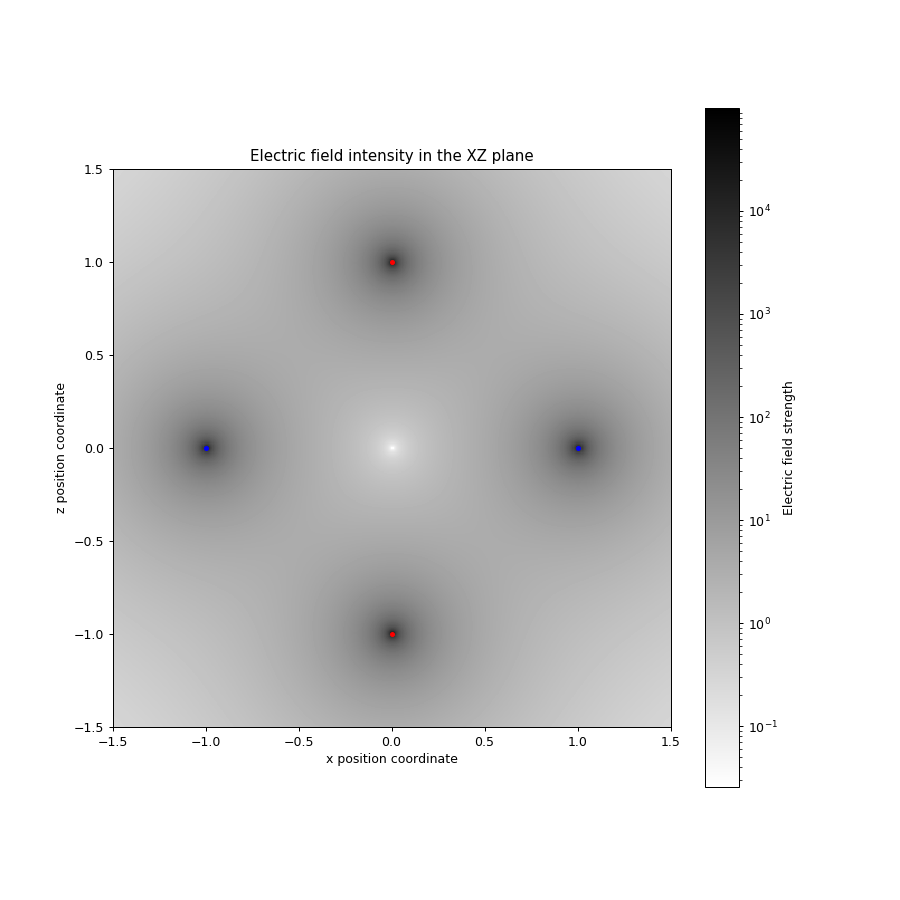

Red dots represent charge of +q₀
Blue dots represent charge of -q₀
Y_component of Electric field is not shown


In [28]:
plt.figure(figsize=[10,10])
plt.imshow(domain, extent=(min(x_array) ,max(x_array) , min(z_array) ,max(z_array)), interpolation='nearest', origin='lower', cmap='binary', norm=LogNorm())
cb = plt.colorbar()
cb.set_label("Electric field strength")
plt.plot([0, 0], [1, -1], 'r.')
plt.plot([1, -1], [0, 0], 'b.')
plt.xlabel("x position coordinate")
plt.ylabel("z position coordinate")
plt.title("Electric field intensity in the XZ plane")
print("Red dots represent charge of +q\u2080")
print("Blue dots represent charge of -q\u2080")
print("Y_component of Electric field is not shown")

In [29]:
plt.close()

Combining the 2

<IPython.core.display.Javascript object>


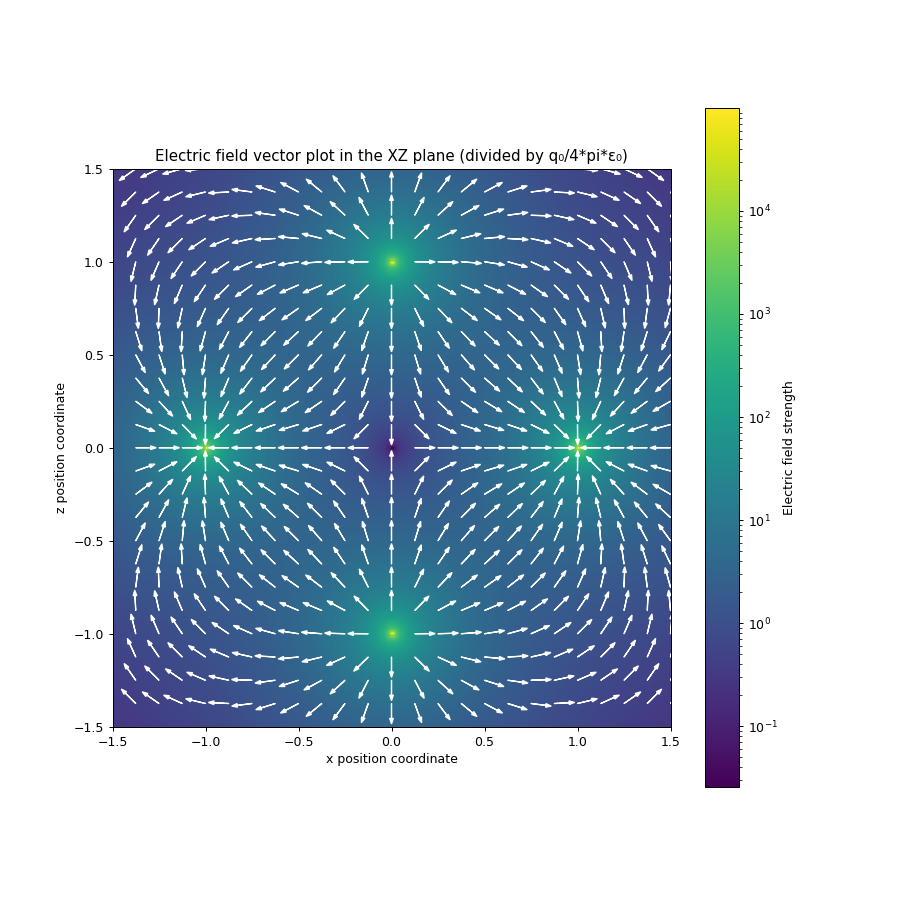

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


Text(0.5, 1.0, 'Electric field vector plot in the XZ plane (divided by q₀/4*pi*ε₀)')

In [30]:
vec_mag_show = False

x_array = np.linspace(x_llim, x_ulim, n)
y_array = np.linspace(y_llim, y_ulim, n)
z_array = np.linspace(z_llim, z_ulim, n)

plt.figure(figsize=[10,10])

for i in range(1, len(x_array)):
    for k in range(1, len(z_array)):
        Ex, Ey, Ez = E_field(x_array[i], 0, z_array[k])
        
        if vec_mag_show:
            E_mag = mag([Ex, Ey, Ez])
            if E_mag > scale_lim:
                plt.arrow(x_array[i], z_array[k], Ex/scale_vec_mag, Ez/scale_vec_mag, head_width=0.02, color='white')
            else:
                plt.arrow(x_array[i], z_array[k], Ex, Ez, head_width=0.02, color='white') 
        else:
            E_mag = mag([Ex, Ey, Ez])*scale_free
            plt.arrow(x_array[i], z_array[k], Ex/E_mag, Ez/E_mag, head_width=0.02, color='white') 
        
        #plt.arrow(x, y, dx, dy, **kwargs)
        #This draws an arrow from ``(x, y)`` to ``(x+dx, y+dy)``
        
plt.axis([x_llim, x_ulim, z_llim, z_ulim])
plt.imshow(domain, extent=(min(x_array) ,max(x_array) , min(z_array) ,max(z_array)), interpolation='nearest', origin='lower', cmap='viridis', norm=LogNorm())
cb = plt.colorbar()
cb.set_label("Electric field strength")

#plt.plot([0, 0], [1, -1], 'ro')
#plt.plot([1, -1], [0, 0], 'bo')

plt.xlabel("x position coordinate")
plt.ylabel("z position coordinate")
plt.title("Electric field vector plot in the XZ plane (divided by q\u2080/4*pi*\u03b5\u2080)")

In [31]:
plt.close()